In [1]:
#Importing packages
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
!pip install scipy statsmodels quantecon pydsge

In [3]:
!pip install quantecon

In [4]:
#Loading the data

data = pd.read_csv('Inflation.csv')

### Data Cleaning and Exploration

In [5]:
data.isnull().sum()

Date    0
Rate    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    121 non-null    object 
 1   Rate    121 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [7]:
# Loading the data into a dataframe

df = pd.DataFrame(data)

In [8]:
df.columns

Index(['Date', 'Rate'], dtype='object')

In [9]:
#Converting the date column to datetime

df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

In [10]:
df.head()

,Rate
Date,
2014-12-01,0.1699
2015-01-01,0.1644
2015-02-01,0.1650
2015-03-01,0.1664
2015-04-01,0.1676


In [11]:
# Set Date and Rate as columns

df = df.rename(columns={'Date': 'date', 'Rate': 'rate'})

df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2014-12-01 to 2024-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rate    121 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


In [12]:
df.tail()

,rate
Date,
2024-08-01,0.204
2024-09-01,0.215
2024-10-01,0.221
2024-11-01,0.230
2024-12-01,0.238


In [13]:
# Setting the df['Rate] to numerical values

df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2014-12-01 to 2024-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rate    121 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


Text(0.5, 1.0, 'Inflation Rate till December 2024')

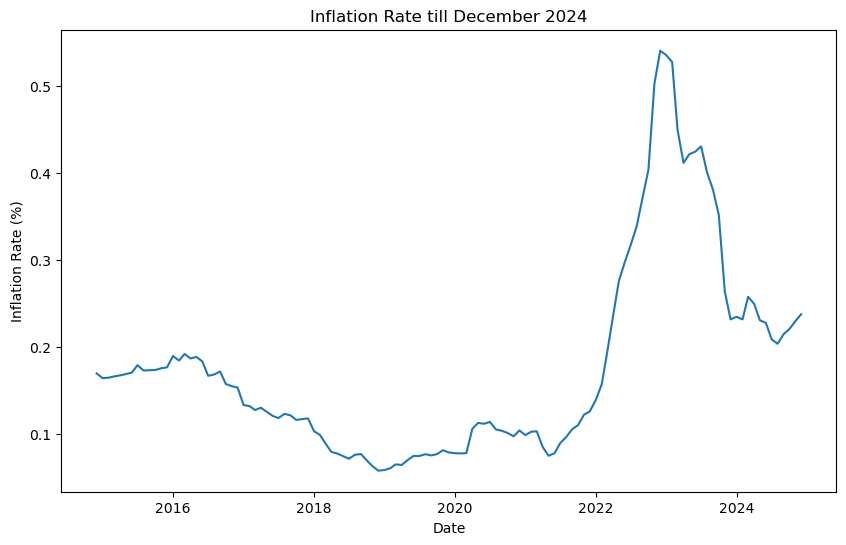

In [14]:
#Ploltting the inflation data in months

plt.figure(figsize=(10,6))

plt.plot(df.index, df['rate'])

plt.xlabel('Date')

plt.ylabel('Inflation Rate (%)')

plt.title('Inflation Rate till December 2024')


### Modeling with Markov Switch Models (MSM)

In [19]:
# Defining the  MSM for Inflation
import statsmodels.api as sm

mod = sm.tsa.MarkovRegression(df['rate'], k_regimes=2, trend='c', switching_variance=True)
res = mod.fit()

# Print Summary
print(res.summary())


                        Markov Switching Model Results                        
Dep. Variable:                   rate   No. Observations:                  121
Model:               MarkovRegression   Log Likelihood                 183.350
Date:                Mon, 03 Feb 2025   AIC                           -354.701
Time:                        10:26:12   BIC                           -337.926
Sample:                    12-01-2014   HQIC                          -347.888
                         - 12-01-2024                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0946      0.003     30.771      0.000       0.089       0.101
sigma2         0.0005   9.72e-05      4.922      0.0

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


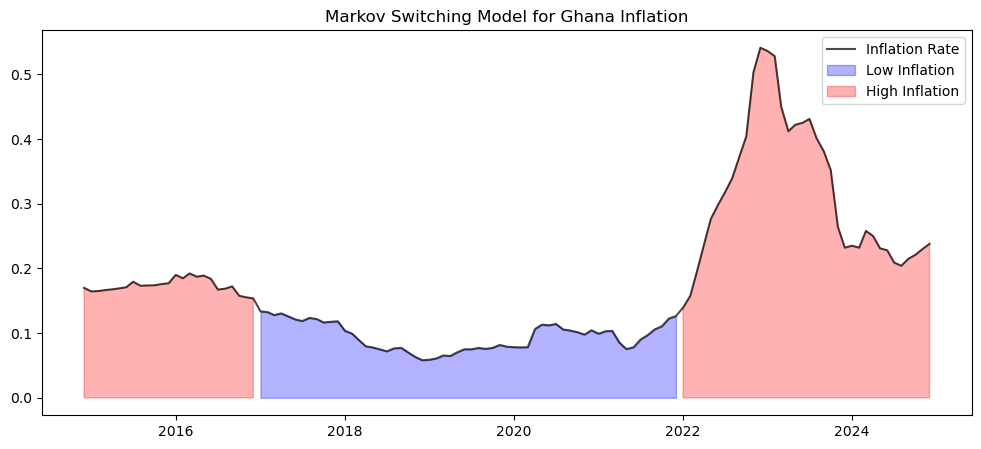

In [27]:
# Extracting Regimes and Visualizing

# Get Smoothed Probabilities
df["Low Inflation Regime"] = res.smoothed_marginal_probabilities[0]
df["High Inflation Regime"] = res.smoothed_marginal_probabilities[1]

# Plot Inflation & Regimes
plt.figure(figsize=(12,5))
plt.plot(df['rate'], label="Inflation Rate", color='black', alpha=0.7)
plt.fill_between(df.index, df['rate'], where=df["Low Inflation Regime"] > 0.5, color="blue", alpha=0.3, label="Low Inflation")
plt.fill_between(df.index, df['rate'], where=df["High Inflation Regime"] > 0.5, color="red", alpha=0.3, label="High Inflation")
plt.legend()
plt.title("Markov Switching Model for Ghana Inflation")
plt.show()


In [29]:
#Future Predictions in 2025
forecast_steps = 12
forecast = res.predict(start=len(df), end=len(df) + forecast_steps - 1)

# Plot Forecast
plt.figure(figsize=(10,5))
plt.plot(df.index[-50:], df['rate'].iloc[-50:], label="Historical Inflation", color="black")
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq="M")[1:], forecast, label="Forecasted Inflation", linestyle="dashed", color="red")
plt.legend()
plt.title("2025 Inflation Forecast using Markov Switching Model")
plt.show()


NotImplementedError: 